In [0]:
#Author : Vaibhavi Itkyal
#Student ID : s4596970

import matplotlib.pyplot as plt
from skimage import data

image = data.camera()
#plt.imshow(image, cmap='gray')
#print(image.shape)

In [0]:
import tensorflow as tf

def sobel_horizontal(image):
  #Kernel weights as a 2D array. 
  kernel_h = [[1,2,1], [0,0,0], [-1,-2,-1]]

  input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
  image_processed = tf.expand_dims(tf.expand_dims(input_tensor, 0), 3)

  with tf.name_scope('convolution'):
      conv_h = tf.constant(kernel_h, dtype=tf.float32, shape=(3, 3, 1, 1))
      filtered_h = tf.nn.conv2d(input=image_processed, filter=conv_h, strides=[1, 1, 1, 1], padding='SAME')

  with tf.Session() as sess:
      result_h = sess.run(filtered_h)
      
  return result_h

In [0]:
import tensorflow as tf

def sobel_vertical(image):
  #Kernel weights as a 2D array
  kernel_v = [[1,0,-1], [2,0,-2], [1,0,-1]]

  input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
  image_processed = tf.expand_dims(tf.expand_dims(input_tensor, 0), 3)

  with tf.name_scope('convolution'):
      conv_v = tf.constant(kernel_v, dtype=tf.float32, shape=(3, 3, 1, 1)) 
      filtered_v = tf.nn.conv2d(input=image_processed, filter=conv_v, strides=[1, 1, 1, 1], padding='SAME')

  with tf.Session() as sess:
      result_v = sess.run(filtered_v)

  return result_v

In [0]:
def plot_edges(option):
  if (option=='1'):
    display_h = sobel_horizontal(image)
    plt.imshow(display_h[0, :, :, 0], cmap='gray') #Horizontal Edges
  elif (option=='2'):
    display_v = sobel_vertical(image)
    plt.imshow(display_v[0, :, :, 0], cmap='gray') #Vertical Edges
  elif (option=='3'):
    display_h = sobel_horizontal(image)
    display_v = sobel_vertical(image)
    display = ((display_v**2) + (display_h**2))**0.5 #computing edge magnitude 
    plt.imshow(display[0, :, :, 0], cmap='gray') #Edge Magnitude
  else:
    print('Please choose a number from 1,2,3 only.')

Choose the number corresponding to the image transformation you want
1. Horizontal edges of an image using Sobel Transform
2. Vertical edges of an image using Sobel Transform
3. Edge Magnitiude using Sobel Transform
1


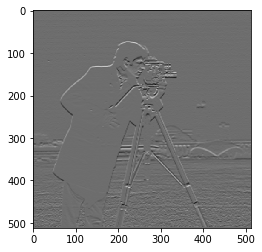

In [132]:
if __name__ == "__main__":

  print('Choose the number corresponding to the image transformation you want')
  print('1. Horizontal edges of an image using Sobel Transform\n2. Vertical edges of an image using Sobel Transform\n3. Edge Magnitiude using Sobel Transform')
  number = input()

  plot_edges(number)